#### Import Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from IPython.display import HTML
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

#### CSV Overview

In [57]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [58]:
print(calories.columns)
print(exercise.columns)

Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [59]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [60]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


#### Data Cleaning

In [62]:
exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [63]:
exercise_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [64]:
print(exercise_df.isnull().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [65]:
print(exercise_df.columns)

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')


In [66]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [67]:
print(exercise_df['Gender'].unique())

['male' 'female']


In [68]:
exercise_df['Gender'] = exercise_df['Gender'].map({'male': 1, 'female': 0})
exercise_df['BMI'] = exercise_df['Weight'] / ((exercise_df['Height'] / 100) ** 2)

exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063


#### Data Scaling

In [70]:
features_to_scale = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
scaler = StandardScaler()
exercise_df[features_to_scale] = scaler.fit_transform(exercise_df[features_to_scale])
exercise_df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
0,14733363,1,1.484726,1.089582,1.265909,1.619127,0.989404,0.994023,231.0,26.038781
1,14861698,0,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,66.0,21.773842
2,11179863,1,1.543620,0.318066,0.268247,-1.265861,-0.784569,-1.701035,26.0,24.655910
3,16180408,0,-0.517665,0.318066,-0.263839,-0.304198,0.467647,0.609015,71.0,22.159109
4,17771927,0,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,35.0,24.456063
...,...,...,...,...,...,...,...,...,...,...
14995,15644082,0,-1.342179,1.299996,0.733822,-0.544614,-0.367164,0.480679,45.0,23.087868
14996,17212577,0,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,-1.059355,23.0,23.875115
14997,17271188,0,0.012379,-1.084691,-1.128480,0.056426,-0.575866,0.095670,75.0,22.942130
14998,18643037,1,2.073665,1.299996,1.465441,-1.626484,-1.201975,-2.214380,11.0,26.040968


#### Split the Cleaned Data

In [72]:
X = exercise_df[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = exercise_df[['Calories']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12000, 7)
X_test shape: (3000, 7)
y_train shape: (12000, 1)
y_test shape: (3000, 1)


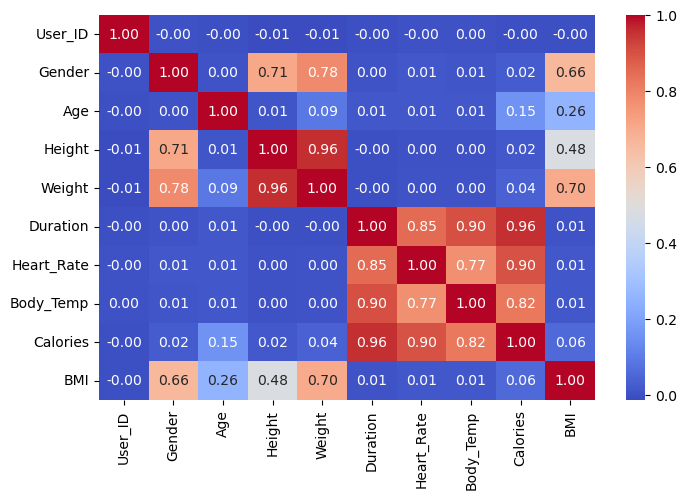

In [73]:
plt.figure(figsize=(8,5))
sns.heatmap(exercise_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### Training the Model

In [103]:
exercise_df['HR_Duration'] = exercise_df['Heart_Rate'] * exercise_df['Duration']

X = exercise_df.drop(columns=['Calories', 'Body_Temp', 'User_ID', 'BMI'])
y = exercise_df['Calories']

X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=['Calories_Predicted'])
print(y_pred_df.head())

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Calories Prediction - MAE: {mae:.2f}, MSE: {mse:.2f}, R² Score: {r2:.2f}")


   Calories_Predicted
0              171.52
1              189.50
2               52.65
3              160.86
4              221.09
Calories Prediction - MAE: 1.55, MSE: 5.79, R² Score: 1.00


#### Save the model

In [97]:
import joblib

# Save trained model as a .pkl file
joblib.dump(model, "calorieburn_predictor.pkl")

print("Model saved as calorieburn_predictor.pkl")

Model saved as calorieburn_predictor.pkl
